# The basics of Monte Carlo integration

https://towardsdatascience.com/the-basics-of-monte-carlo-integration-5fe16b40482d#:~:text=If%20we%20take%20a%20random,computed%20for%20random%20picked%20x_i.

randomly sample and calculate the integration

Real value to find: 0.8413478010629014
Integral value:  0.8303185777563798
Calculation error: 0.01966799471023998


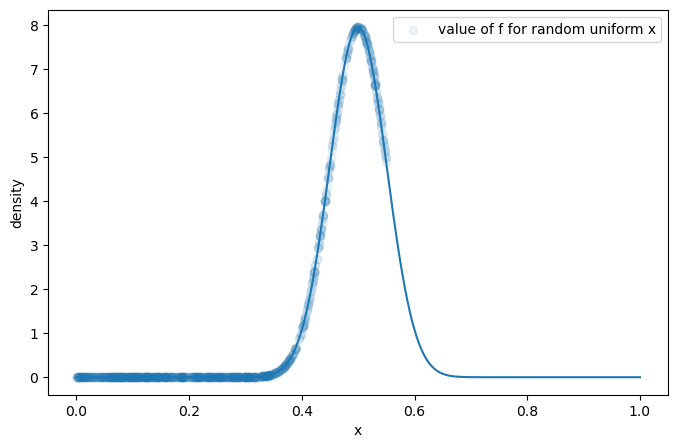

In [2]:
# Monte Carlo estimator

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = 10000
a, b = (50, 50)
x_min, x_max = (0, .55)
randx = np.random.uniform(x_min, x_max, N)
y = stats.beta.pdf(randx, a, b)
print(f'Real value to find: {stats.beta(a,b).cdf(.55)}')
print(f'Integral value:  {(x_max-x_min)*y.sum()/N}')
print(f'Calculation error: {np.sqrt((x_max-x_min)*(y*y).sum()/N - (x_max-x_min)*y.mean()**2)/np.sqrt(N)}')

# Plotting 
plt.figure(figsize=(8,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, a, b))
# Then, let's only plot a thousand points for more readability
plt.scatter(randx[:1000], y[:1000], alpha=.08, label='value of f for random uniform x')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

Integral value: 0.8400240235170914


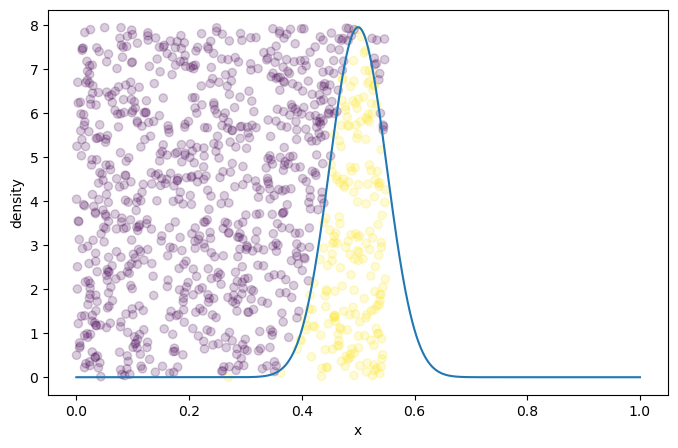

In [3]:
# Geometric estimation of the area under the curve

N = 10000
a, b = (50,50)
x_min, x_max = (0, .55)

randx = np.random.uniform(x_min,x_max, N)
y = stats.beta.pdf(randx, a, b)
randy = np.random.uniform(0,y.max(), N)
print(f'Integral value: {(x_max-x_min)*y.max()*(randy <= y).sum()/N}')

plt.figure(figsize=(8,5))
color = randy[:1000] <= y[:1000]
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, a, b))
plt.scatter(randx[:1000], randy[:1000], alpha=.2, c = color)
plt.xlabel('x')
plt.ylabel('density')
plt.show()

Integral value: 0.8319187269705602
Error: 0.004839317742070862



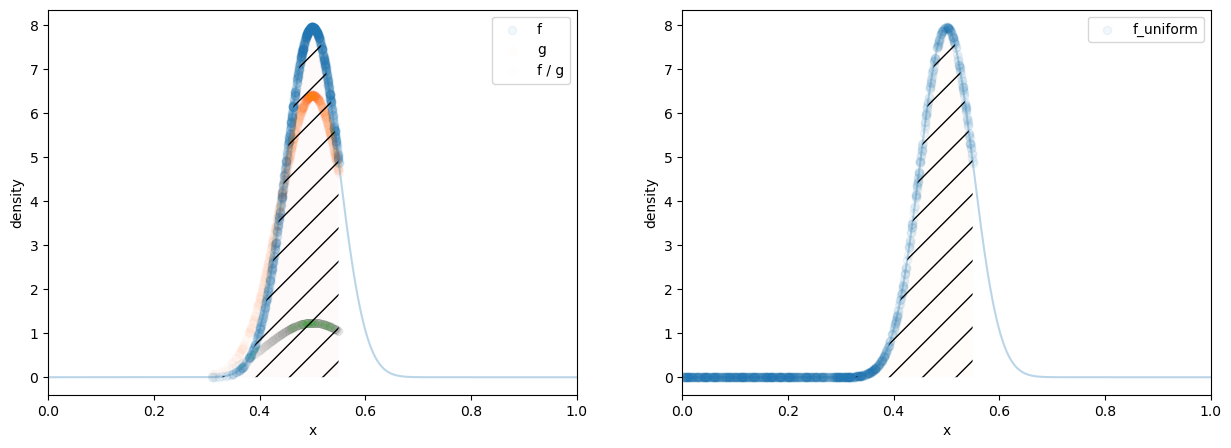

In [4]:
# Importance Sampling

n = 10000
a, b = (50,50)
x_min, x_max = (0, .55)

mean, var = stats.beta.stats(a, b, moments='mv')

randx = np.random.normal(mean, 1.25*np.sqrt(var), size=n)
randx_uniform = np.random.uniform(x_min, x_max, size=n)

randx = randx[(randx >= x_min) & (randx <= x_max)]

f = stats.beta(a,b).pdf(randx)
f_uniform = stats.beta(a,b).pdf(randx_uniform)
g = stats.norm.pdf(randx, mean, 1.25*np.sqrt(var))

y = f / g

print(f'Integral value: {1*y.sum()/n}')
print(f'Error: {np.sqrt(1/n * (y * y).sum() - (1/n * y.sum())**2)/np.sqrt(n)}', end = '\n\n')

fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].scatter(randx[:1000], f[:1000], alpha=.06, label='f')
axs[1].scatter(randx_uniform[:1000], f_uniform[:1000], alpha=.06, label='f_uniform')
axs[0].scatter(randx[:1000], g[:1000], alpha=.01, label='g')
axs[0].scatter(randx[:1000], y[:1000], alpha=.005, label='f / g')

x = np.linspace(0, 1, 1000)
x_to_fill = np.array([0 for _ in range(len(x))])
x_to_fill[(x>=x_min) & (x<=x_max)] = 1

axs[0].plot(x, stats.beta.pdf(x, a, b), alpha= .3)
axs[1].plot(x, stats.beta.pdf(x, a, b), alpha= .3)
axs[0].fill_between(x, stats.beta.pdf(x, a, b), alpha=.02, where=x_to_fill, hatch= '/')
axs[1].fill_between(x, stats.beta.pdf(x, a, b), alpha=.02, where=x_to_fill, hatch= '/')

axs[0].set_xlabel('x')
axs[0].set_ylabel('density')
axs[1].set_xlabel('x')
axs[1].set_ylabel('density')
axs[0].legend()
axs[1].legend()
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
plt.show()

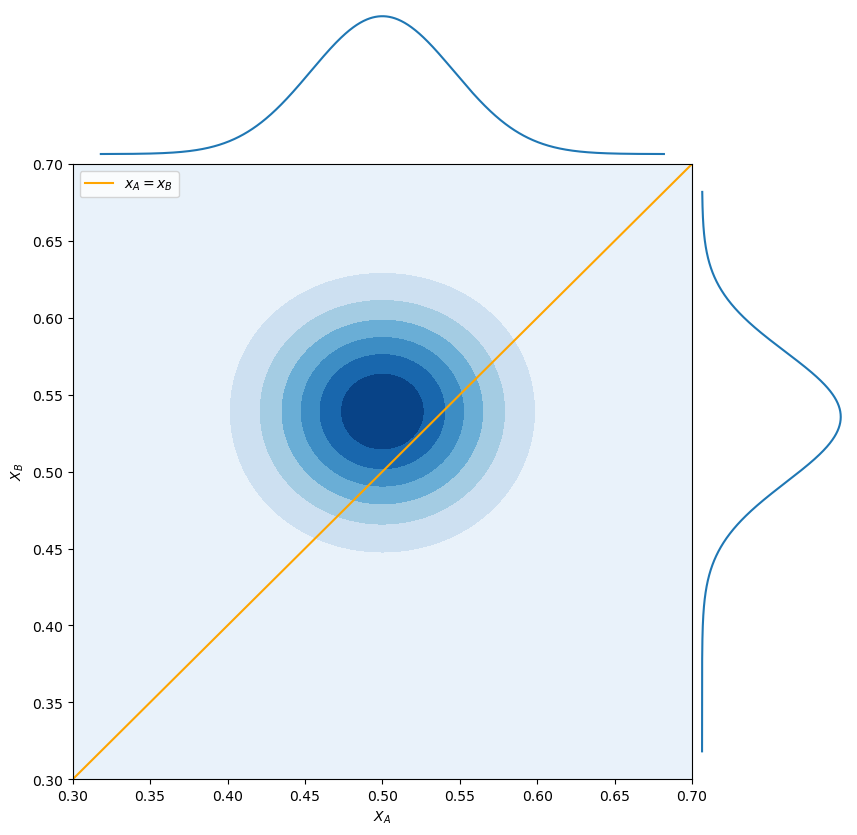

In [6]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def jointplot():
    """Tool function to create a 3 part grid plot."""
    f = plt.figure(figsize=(10,10))
    gs0 = gridspec.GridSpec(5, 5, figure=f, wspace=.02, hspace=.02)
    ax1 = f.add_subplot(gs0[1:, :-1])
    ax2 = f.add_subplot(gs0[:1, :-1])
    ax3 = f.add_subplot(gs0[1:, -1:])
    return ax1, ax2, ax3

a_1, b_1 = (50,50)
a_2, b_2 = (63,54)

x = pd.Series(np.linspace(.3,.7,1000))
y = stats.beta.pdf(x, a, b)
x_min, x_max = (0, 1)

y_1 = stats.beta.pdf(x, a_1, b_1)
y_2 = stats.beta.pdf(x, a_2, b_2)

X, Y = np.meshgrid(y_1, y_2)
Z = X * Y

# PLOT
ax1, ax2, ax3 = jointplot()

ax1.contourf(x, x, Z, cmap= 'Blues')
ax1.plot(x, x, color = 'orange', label = '$x_A = x_B $')
ax2.plot(x, y_1)
ax3.plot(y_2, x)

ax1.set_xlabel('$X_A$')
ax1.set_ylabel('$X_B$')

ax3.set_axis_off()
ax2.set_axis_off()

ax1.legend()
plt.show()

In [7]:
# with the crude method
N = 100000

randx_1 = np.random.uniform(x_min, x_max, N)
randx_2 = np.random.uniform(x_min, x_max, N)

y_1 = stats.beta.pdf(randx_1, a_1, b_1)
y_2 = stats.beta.pdf(randx_2, a_2, b_2)
z = y_1 * y_2

b_better_a_x = randx_1<=randx_2
b_better_a_z = z[b_better_a_x]

print(f'Integral value:  {1*b_better_a_z.sum()/N}')
print(f'Calculation error: {np.sqrt(1*(b_better_a_z*b_better_a_z).sum()/N - 1*b_better_a_z.mean()**2)/np.sqrt(N)}')


Integral value:  0.7197747600038645
Calculation error: 0.015950999295290605


In [8]:
# with importance sampling

N = 100000

mean_1, var_1 = stats.beta.stats(a_1, b_1, moments='mv')
mean_2, var_2 = stats.beta.stats(a_2, b_2, moments='mv')

randx_1 = np.random.normal(mean_1, 1.25*np.sqrt(var_1), size=N)
randx_2 = np.random.normal(mean_2, 1.25*np.sqrt(var_2), size=N)

y_1 = stats.beta.pdf(randx_1, a_1, b_1)
y_2 = stats.beta.pdf(randx_2, a_2, b_2)

g_1 = stats.norm.pdf(randx_1, mean_1, 1.25*np.sqrt(var_1))
g_2 = stats.norm.pdf(randx_2, mean_2, 1.25*np.sqrt(var_2))

z = (y_1 * y_2) / (g_1 * g_2)

b_better_a_x = randx_1 <= randx_2
b_better_a_z = z[b_better_a_x]

print(f'Integral value:  {1*b_better_a_z.sum()/N}')
print(f'Calculation error: {np.sqrt(1*(b_better_a_z*b_better_a_z).sum()/N - (1*b_better_a_z.sum()/N)**2)/np.sqrt(N)}')


Integral value:  0.7154614003430193
Calculation error: 0.0018531890131787282
